__Startup Ecosystem Analysis__

+ __Project Description__

The Startup Ecosystem Analysis Company Branding, Funding, and Growth Trends" project is aimed at gaining insights into the world of startups, particularly focusing on their branding, funding, and growth patterns.

In [1]:
# import all necessary packages

import pyodbc 
from dotenv import dotenv_values 
import pandas as pd
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary

environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file

database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

In [3]:
# create connection

connection = pyodbc.connect(conn_str)

In [4]:
# Now the sql query to get the data 


# SQL query
query = "SELECT * FROM dbo.LP1_startup_funding2020"





In [5]:
 # Read data into a DataFrame



df = pd.read_sql(query, connection)



In [6]:
# data preview

df.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [7]:
df.shape

(1055, 10)

In [8]:
# check for duplicates in company name with same sector and HQ

duplicates = df[df.duplicated(subset=['Company_Brand', 'HeadQuarter', 'Sector'], keep=False)]
duplicates

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
72,Smallcase,2015.0,Bangalore,FinTech,Changing how India invests in equities,"Anugrah Shrivastava, Rohan Gupta, Vasanth Kamath","WEH Ventures, BEENEXT",NaN,None,None
109,Credgenics,2018.0,Gurugram,FinTech,Credgenics is a tech-enabled platform backed b...,"Anand Agrawal, Mayank Khera, Rishabh Goel","Accel India, Breadlake Ventures",3000000.0,Pre-series A,None
116,Unacademy,2015.0,Bangalore,EdTech,Unacademy is an online learning platform provi...,"Gaurav Munjal, Hemesh Singh, Roman Saini, Sach...","Dragoneer Investment Group, Tiger Global Manag...",NaN,None,None
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
124,Byju's,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Owl Ventures, Tiger Global Management",200000000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
993,Mera Cashier,2019.0,Noida,Fintech,App meant for small and micro businessmen to m...,"Suneel Kumar, Sucharita Reddy, Gaurav Tomar, A...","Amit Singal, Manish Aggarwal",250000.0,Seed Round,None
1009,Bounce,2014.0,Bangalore,Automotive and Rentals,Offers a variety of bikes and scooters that ca...,"Vivekananda Hallekere, Anil Giri Raju,Arun Agni","Accel Partners, B Capital",97500000.0,Series D,None
1014,Capital Float,2013.0,Bangalore,Fintech,Digital lending,"Gaurav Hinduja, Sashank Rishyasringa","Sequoia Capital, Ribbit Capital, Amazon, Saif ...",15000000.0,None,None
1035,Byju,2011.0,None,Edtech,Provides online learning classes,Byju Raveendran,Tiger Global,200000000.0,None,None


In [9]:


# covert values to lower case to avoid case sensitivity

df['Company_Brand'] = df['Company_Brand'].str.lower()
df['HeadQuarter'] = df['HeadQuarter'].str.lower()
df['Sector'] = df['Sector'].str.lower()


# Drop duplicates, keeping the first occurrence

df = df.drop_duplicates(subset=['Company_Brand', 'HeadQuarter', 'Sector'], keep='first')


df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1049,fashor,2017.0,chennai,fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A,None
1050,leverage edu,NaN,delhi,edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,epifi,NaN,None,fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,purplle,2012.0,mumbai,cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None


In [10]:
df['Company_Brand']

0         aqgromalin
1           krayonnz
2       padcare labs
3              ncome
4         gramophone
            ...     
1049          fashor
1050    leverage edu
1051           epifi
1052         purplle
1054           pando
Name: Company_Brand, Length: 984, dtype: object

In [11]:
#   check for brand names with same 'What_it_does' and 'Sector'

df_dups = df[df.duplicated(subset=['Company_Brand', 'What_it_does', 'Sector'], keep=False)]
df_dups

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
100,credgenics,2018.0,new delhi,fintech,Credgenics is a tech-enabled platform backed b...,"Anand Agrawal, Mayank Khera, Rishabh Goel","Accel India, Breadlake Ventures",3000000.0,Pre-series A,None
109,credgenics,2018.0,gurugram,fintech,Credgenics is a tech-enabled platform backed b...,"Anand Agrawal, Mayank Khera, Rishabh Goel","Accel India, Breadlake Ventures",3000000.0,Pre-series A,None
598,paper boat,2013.0,gurugram,food & beverages,Ecommerce platform for beverages and snacks,"Neeraj Kakkar, James Nutall, Suhas Misra, Neer...","Sofina Ventures, A91 Emerging fund, SCI Growth...",3700000.0,None,None
636,sarva,NaN,mumbai,yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,Shikhar Dhawan,NaN,None,None
743,sarva,NaN,None,yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,"Mantra Capital, Patni Family",NaN,None,None
859,paper boat,2013.0,bangalore,food & beverages,Ecommerce platform for beverages and snacks,"Neeraj Kakkar, James Nutall, Suhas Misra, Neer...","Advent Management, A91 Emerging Fund, Trifecta...",4049500.0,None,None


In [12]:
# drop duplicates of brand names with same with same 'What_it_does' and 'Sector'

df = df.drop_duplicates(subset=['Company_Brand', 'What_it_does', 'Sector'], keep='first')
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1049,fashor,2017.0,chennai,fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A,None
1050,leverage edu,NaN,delhi,edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,epifi,NaN,None,fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,purplle,2012.0,mumbai,cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None


In [13]:
# check null in HQ (HeadQuarter)

result = df[df['HeadQuarter'].isnull()]
result


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
87,habitat,2016.0,None,edtech,"Habitat, a social learning edtech platform for...","Rohit Pande, Shikhar Sachan","Unitus Ventures, Whiteboard Capital",600000.0,Seed,None
92,raskik,2019.0,None,fusion beverages,All new fusion-flavour fruit juices with the g...,"Vikas Chawla, Abhay Parnerkar, Satyajit Ram","Venture Catalysts, 9Unicorns",1000000.0,Pre-series A,None
95,pravasirojgar,2020.0,None,job portal,Initiative for blue-collar job workers,Sonu Sood,GoodWorker.,33000000.0,None,None
121,kaagaz scanner,2020.0,None,scanning app,Kaagaz Scanner is the Indian replacement to ba...,"Snehanshu Gandhi, Gaurav Shrishrimal",Pravega Ventures,575000.0,None,None
487,exprs,2018.0,None,nano distribution network,"Nano Distribution Centres, enabling seamless c...","Srinivas Madhavam, Srikanth Rajashekhar, Rahul...","Sweta Rau, Sandeep Kapoor",5660000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1034,zomato,NaN,None,foodtech,Online food delivery and restaurant discovery ...,Deepinder Goyal,Ant Financial,150000000.0,None,None
1041,shiksha,2008.0,None,edtech,It makes college selection easy for students l...,Kanav Sachdeva,Mumbai Angels Network,181000.0,None,None
1045,xpressbees,2015.0,None,logistics,Provides end to end supply chain solutions,"Supam Maheshwari, Amitava Saha",Alibaba,10000000.0,None,None
1047,wealth bucket,2018.0,None,fintech,An online platform for mutual fund investments,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal",3000000.0,None,None


In [14]:
# check for % of null values in HQ


column_name = 'HeadQuarter'
total_rows = len(df)
null_count = df['HeadQuarter'].isnull().sum()
percentage_null = (null_count / total_rows) * 100



print(f"The percentage of null values in '{column_name}' column is: {percentage_null:.2f}%")

The percentage of null values in 'HeadQuarter' column is: 9.17%


the null values in the HeadQuarter is ignored for it has no significant impact on analysis

In [15]:
# drop 'column10'from data

df= df.drop('column10', axis=1)
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
...,...,...,...,...,...,...,...,...,...
1049,fashor,2017.0,chennai,fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A
1050,leverage edu,NaN,delhi,edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None
1051,epifi,NaN,None,fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,purplle,2012.0,mumbai,cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  981 non-null    object 
 1   Founded        789 non-null    float64
 2   HeadQuarter    891 non-null    object 
 3   Sector         969 non-null    object 
 4   What_it_does   981 non-null    object 
 5   Founders       969 non-null    object 
 6   Investor       943 non-null    object 
 7   Amount         735 non-null    float64
 8   Stage          552 non-null    object 
dtypes: float64(2), object(7)
memory usage: 76.6+ KB


In [17]:
# change column name' What it does' to  What_it_does
df = df.rename(columns={ 'What it does':' What_it_does'})
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
...,...,...,...,...,...,...,...,...,...
1049,fashor,2017.0,chennai,fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A
1050,leverage edu,NaN,delhi,edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None
1051,epifi,NaN,None,fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,purplle,2012.0,mumbai,cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None


first data set has 9 columns and 981 entries now

In [18]:
null_amt = df[df['Amount'].isna()]

null_amt.head(20)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
7,metvy,2018.0,gurgaon,networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series
11,medfin,2017.0,bangalore,healthtech,Medfin is a Discovery platform for medical pro...,"Arjun Kumar, Arun Kumar, Sidharth Gurjar","Axilor Ventures, S.D. Shibulal",NaN,Series A
12,masterg,2015.0,new delhi,fashion startup,MasterG is a design and skill development orga...,Gayatri Jolly,Acumen Fund's angel programme,NaN,None
18,pine labs,1998.0,noida,fintech,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",NaN,None
20,ewar,2019.0,bangalore,gaming,EWar Games is a e-sports and real-time gaming ...,"Parth Chadha, Rahul Singh","Jindal Steels, Jeet Banerjee",NaN,Pre-series A
28,voosh,2020.0,bangalore,food industry,Building India's largest digital food service ...,Priyam Saraswat,Better Capital,NaN,Pre-seed
29,delhivery,2011.0,gurgaon,e-commerce,Delhivery is a supply chain services company t...,"Kapil Bharati, Mohit Tandon, Sahil Barua, Sura...","Steadview Capital, Canada Pension Plan Investm...",NaN,None
35,hudle,2016.0,new delhi,sports,Hudle is a sports & fitness discovery & bookin...,Suhail Narain,Survam Partners,NaN,Pre-series A
40,fleeca india,2016.0,jaipur,tyre management,FLEECA is a Tyre Care Provider company.,Tikam Jain,Bridgestone India,NaN,None


In [19]:
# Create a SimpleImputer instance with the strategy set to 'mean'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Amount' column and transform the DataFrame
df['Amount'] = imputer.fit_transform(df[['Amount']])

# Print the DataFrame to verify the changes
df.head(20)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
5,qzense,2019.0,bangalore,agritech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
6,myclassboard,2008.0,hyderabad,edtech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
7,metvy,2018.0,gurgaon,networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,3000000.0,Pre-series
8,rupeek,2015.0,bangalore,fintech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C
9,gig india,2017.0,pune,crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A


Query to get the second dataset

In [20]:
# query to get the second dataset

query = "SELECT * FROM dbo.LP1_startup_funding2021"

 
 # Read data into a DataFrame
df_1= pd.read_sql(query, connection)



Preview second dataset

In [21]:
# Preview second dataset in dataframe

df_1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [22]:
# DataFrame's structure and data types of its columns.

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


second data set has 9 columns and 1209 entries 

Read the third dataset

In [23]:
# get the third dataset and preview

df_2=pd.read_csv('startup_funding2019.csv')

df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


clean column names to be as of previous datasets

In [24]:

# create dictionary to map column names
new_colnames = {
    
    'Company/Brand':'Company_Brand',
   
    'What it does':'What_it_does',
    'Amount($)':'Amount'}
df_2 = df_2.rename(columns=new_colnames)
# Company_Brand	Founded	HeadQuarter	Sector	What_it_does	Founders	Investor	Amount	Stage

df_2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


Read the last dataset

In [25]:
# get the third dataset and preview

df_3=pd.read_csv('startup_funding2018.csv')

df_3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [26]:
def convert_to_dollars(value):
    
    
    if '₹' in value:
        # Remove ₹ symbol and commas, and convert to numeric (1 USD = 75 INR,)
        value = value.replace('₹', '').replace(',', '')
        return pd.to_numeric(value) / 75
    elif '$' in value:
        # Leave values with $ unchanged
        return pd.to_numeric(value.replace('$', '').replace(',', ''))
    else:
        # For other cases, return the original value
        return value

# Apply the function to the 'Amount' column
df_3['Amount']= df_3['Amount'].apply(lambda x: convert_to_dollars(x) if pd.notnull(x) else x)

# Print the DataFrame after conversion
df_3.head()


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,533333.333333,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,866666.666667,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


+ The last dataset is having 6 columns instead of 9 as compared to the previous datasets
+ last dataset has different column names from the previous dataset

__Clean last dataset__

In [27]:
# Rename columns

# create dictionary to map column names
new_colnames = {
    
    'Company Name':'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company':'What_it_does',
    'Amount':'Amount'}
df_3 = df_3.rename(columns=new_colnames)

df_3


# Company_Brand	Founded	HeadQuarter	Sector	What_it_does	Founders	Investor	Amount	Stage



,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,533333.333333,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,866666.666667,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,466666.666667,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


+ __Datasets now have same column names__
+ Concat datasets

In [28]:
# concat datasets along rows(axis=0)

data = pd.concat([df,df_1, df_2, df_3], axis=0, ignore_index=True)



In [29]:
# preview the Dataset

data.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
2800,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C
2801,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,—,Series A
2802,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed
2803,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,466666.666667,Seed
2804,Netmeds,NaN,"Chennai, Tamil Nadu, India","Biotechnology, Health Care, Pharmaceutical",Welcome to India's most convenient pharmacy!,NaN,NaN,35000000,Series C


In [30]:
# function to covert rupee to dollars and remove currency signs
def convert_to_dollars(value):
    
    if isinstance(value, float):

        # If the value is already a float, return it as is
        return value
    elif isinstance(value, str) and value.isdigit():

        # If the value is a string consisting of digits, convert it to numeric
        return pd.to_numeric(value) / 75
    elif isinstance(value, str) and '.' in value:
        # If the value is a string containing a dot (possible decimal), convert it to numeric
        return pd.to_numeric(value) / 75
    else:
        # For other cases, return NaN
        return float('nan')


# Apply the function to the 'Amount' column
data['Amount'] = data['Amount'].apply(lambda x: convert_to_dollars(x) if pd.notnull(x) else x)

# # Convert the 'Amount' column to float
data['Amount'] = data['Amount'].astype(float)

# Print the DataFrame after conversion
data.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2805 non-null   object 
 1   Founded        2057 non-null   float64
 2   HeadQuarter    2695 non-null   object 
 3   Sector         2788 non-null   object 
 4   What_it_does   2805 non-null   object 
 5   Founders       2260 non-null   object 
 6   Investor       2179 non-null   object 
 7   Amount         1300 non-null   float64
 8   Stage          1902 non-null   object 
dtypes: float64(2), object(7)
memory usage: 197.4+ KB


In [32]:
data['Amount'] = data['Amount'].astype(float)

# Create a SimpleImputer instance with the strategy set to 'mean'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Amount' column and transform the DataFrame
data['Amount'] = imputer.fit_transform(data[['Amount']])

# Print the DataFrame to verify the changes
data.head(20)

# # fiil na with mean

# # Calculate the mean of the 'Amount' column
# mean_amount = data['Amount'].mean()

# # Impute null values with the mean
# data['Amount'] = data['Amount'].fillna(mean_amount)

# # Print the DataFrame after imputation
# data.tail()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019.0,chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,krayonnz,2019.0,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,padcare labs,2018.0,pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed
3,ncome,2020.0,new delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,gramophone,2016.0,indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None
5,qzense,2019.0,bangalore,agritech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
6,myclassboard,2008.0,hyderabad,edtech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
7,metvy,2018.0,gurgaon,networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,3000000.0,Pre-series
8,rupeek,2015.0,bangalore,fintech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C
9,gig india,2017.0,pune,crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A


In [33]:

# clean HeadQuarter and Sector  
data['Sector'] = data['Sector'].str.split(',').str[0]

data['HeadQuarter'] = data['HeadQuarter'].str.split(',').str[0]

data.tail()
 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
2800,Udaan,NaN,Bangalore,B2B,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,3.000000e+06,Series C
2801,Happyeasygo Group,NaN,Haryana,Tourism,HappyEasyGo is an online travel domain.,NaN,NaN,3.000000e+06,Series A
2802,Mombay,NaN,Mumbai,Food and Beverage,Mombay is a unique opportunity for housewives ...,NaN,NaN,1.000000e+02,Seed
2803,Droni Tech,NaN,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,4.666667e+05,Seed
2804,Netmeds,NaN,Chennai,Biotechnology,Welcome to India's most convenient pharmacy!,NaN,NaN,4.666667e+05,Series C


In [34]:
# Drop colums

data = data.drop(columns= ['Founded','Founders','Investor'])



In [35]:
data

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
0,aqgromalin,chennai,agritech,Cultivating Ideas for Profit,2.000000e+05,None
1,krayonnz,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,1.000000e+05,Pre-seed
2,padcare labs,pune,hygiene management,Converting bio-hazardous waste to harmless waste,3.000000e+06,Pre-seed
3,ncome,new delhi,escrow,Escrow-as-a-service platform,4.000000e+05,None
4,gramophone,indore,agritech,Gramophone is an AgTech platform enabling acce...,3.400000e+05,None
...,...,...,...,...,...,...
2800,Udaan,Bangalore,B2B,"Udaan is a B2B trade platform, designed specif...",3.000000e+06,Series C
2801,Happyeasygo Group,Haryana,Tourism,HappyEasyGo is an online travel domain.,3.000000e+06,Series A
2802,Mombay,Mumbai,Food and Beverage,Mombay is a unique opportunity for housewives ...,1.000000e+02,Seed
2803,Droni Tech,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,4.666667e+05,Seed


In [36]:
from decimal import Decimal, ROUND_HALF_UP
import pandas as pd

# Assuming 'Amount' is the column you want to convert
data['Amount'] = data['Amount'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP))

# Display the modified DataFrame
data


,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
0,aqgromalin,chennai,agritech,Cultivating Ideas for Profit,200000.00,None
1,krayonnz,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,100000.00,Pre-seed
2,padcare labs,pune,hygiene management,Converting bio-hazardous waste to harmless waste,3000000.00,Pre-seed
3,ncome,new delhi,escrow,Escrow-as-a-service platform,400000.00,None
4,gramophone,indore,agritech,Gramophone is an AgTech platform enabling acce...,340000.00,None
...,...,...,...,...,...,...
2800,Udaan,Bangalore,B2B,"Udaan is a B2B trade platform, designed specif...",3000000.00,Series C
2801,Happyeasygo Group,Haryana,Tourism,HappyEasyGo is an online travel domain.,3000000.00,Series A
2802,Mombay,Mumbai,Food and Beverage,Mombay is a unique opportunity for housewives ...,100.00,Seed
2803,Droni Tech,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,466666.67,Seed


In [37]:
data['Amount'] = data['Amount'].astype(float)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2805 non-null   object 
 1   HeadQuarter    2695 non-null   object 
 2   Sector         2788 non-null   object 
 3   What_it_does   2805 non-null   object 
 4   Amount         2805 non-null   float64
 5   Stage          1902 non-null   object 
dtypes: float64(1), object(5)
memory usage: 131.6+ KB


In [39]:
data['Amount'] =data['Amount'].astype(float)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2805 non-null   object 
 1   HeadQuarter    2695 non-null   object 
 2   Sector         2788 non-null   object 
 3   What_it_does   2805 non-null   object 
 4   Amount         2805 non-null   float64
 5   Stage          1902 non-null   object 
dtypes: float64(1), object(5)
memory usage: 131.6+ KB


In [41]:
data['Amount']

0        200000.00
1        100000.00
2       3000000.00
3        400000.00
4        340000.00
           ...    
2800    3000000.00
2801    3000000.00
2802        100.00
2803     466666.67
2804     466666.67
Name: Amount, Length: 2805, dtype: float64

In [42]:
data.head(30)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
0,aqgromalin,chennai,agritech,Cultivating Ideas for Profit,200000.0,None
1,krayonnz,bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed
2,padcare labs,pune,hygiene management,Converting bio-hazardous waste to harmless waste,3000000.0,Pre-seed
3,ncome,new delhi,escrow,Escrow-as-a-service platform,400000.0,None
4,gramophone,indore,agritech,Gramophone is an AgTech platform enabling acce...,340000.0,None
5,qzense,bangalore,agritech,qZense Labs is building the next-generation Io...,600000.0,Seed
6,myclassboard,hyderabad,edtech,MyClassboard is a full-fledged School / Colleg...,600000.0,Pre-series A
7,metvy,gurgaon,networking platform,AI driven networking platform for individuals ...,3000000.0,Pre-series
8,rupeek,bangalore,fintech,Rupeek is an online lending platform that spec...,45000000.0,Series C
9,gig india,pune,crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Pre-series A


In [43]:
data.isnull().sum()

Company_Brand      0
HeadQuarter      110
Sector            17
What_it_does       0
Amount             0
Stage            903
dtype: int64

In [44]:
data = data.fillna('undisclosed')

data.isnull().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
What_it_does     0
Amount           0
Stage            0
dtype: int64

In [45]:
data['Company_Brand'].duplicated().sum()

362

In [46]:

# Drop duplicates in "Company_Brand"
data['Company_Brand'] = data['Company_Brand'].str.lower()  # Convert to lowercase

columns_to_convert = ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Stage']

# Apply .str.lower() to each specified column
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.lower())

drop_dup_Company_Brand = data.drop_duplicates(subset=['Company_Brand'], inplace=True)  # Drop duplicates

# convert back to original case

data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.title())


data

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
0,Aqgromalin,Chennai,Agritech,Cultivating Ideas For Profit,200000.00,Undisclosed
1,Krayonnz,Bangalore,Edtech,An Academy-Guardian-Scholar Centric Ecosystem ...,100000.00,Pre-Seed
2,Padcare Labs,Pune,Hygiene Management,Converting Bio-Hazardous Waste To Harmless Waste,3000000.00,Pre-Seed
3,Ncome,New Delhi,Escrow,Escrow-As-A-Service Platform,400000.00,Undisclosed
4,Gramophone,Indore,Agritech,Gramophone Is An Agtech Platform Enabling Acce...,340000.00,Undisclosed
...,...,...,...,...,...,...
2799,Slicepay,Bengaluru,Fintech,Slicepay Is An Ai Based Instant Credit App For...,198666.67,Series A
2801,Happyeasygo Group,Haryana,Tourism,Happyeasygo Is An Online Travel Domain.,3000000.00,Series A
2802,Mombay,Mumbai,Food And Beverage,Mombay Is A Unique Opportunity For Housewives ...,100.00,Seed
2803,Droni Tech,Mumbai,Information Technology,Droni Tech Manufacture Uavs And Develop Softwa...,466666.67,Seed


In [47]:
data['Company_Brand'].duplicated().sum()

0

__Business Questions 1__

•	Which sectors have the highest representation among the startups?

In [48]:

# Convert sector names to lowercase before counting
data['Sector'] = data['Sector'].str.lower()

# Get the top 5 sectors
top_sectors = data['Sector'].value_counts().head(5)


top_sectors 

Sector
fintech               184
edtech                156
e-commerce             67
financial services     56
healthcare             53
Name: count, dtype: int64

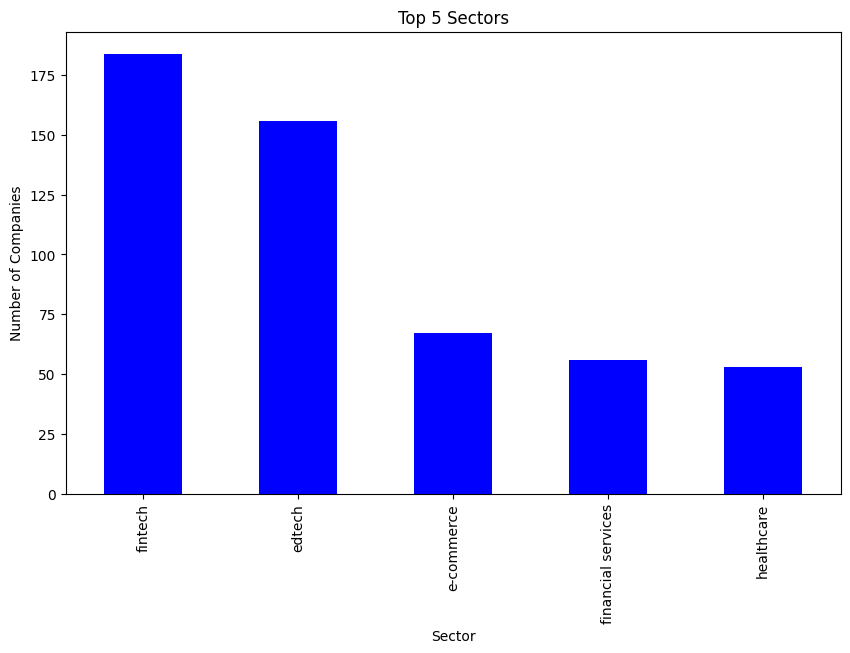

In [49]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_sectors.plot(kind='bar', color='blue')
plt.title('Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.show()

__Business Questions 2__

•	Which cities  have the highest concentration of startups?

In [50]:
# top 5 cities with highest concentration of startups

top_cities = data['HeadQuarter'].value_counts().head(5)

top_cities

HeadQuarter
Bangalore    606
Mumbai       372
New Delhi    168
Gurugram     159
Pune          88
Name: count, dtype: int64

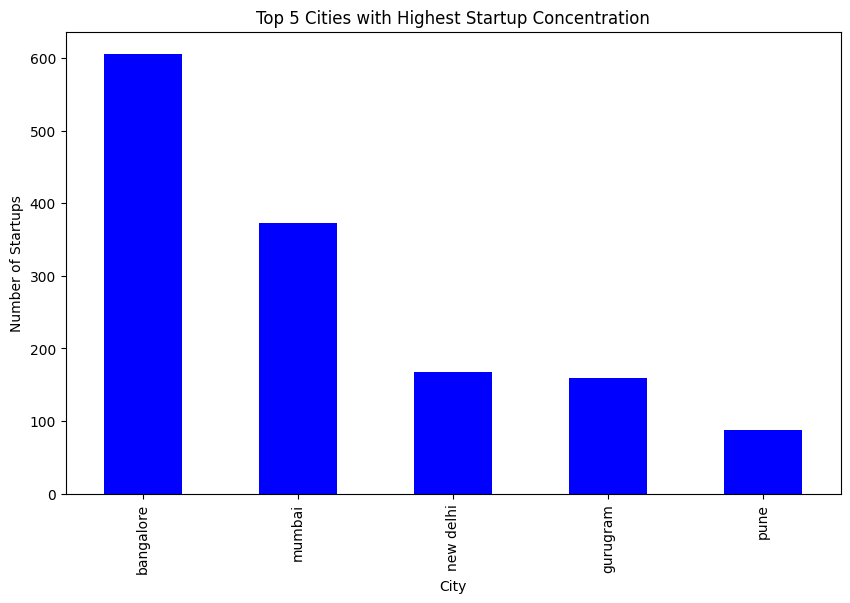

In [51]:
data['HeadQuarter'] = data['HeadQuarter'].str.lower()  # Convert city names to lowercase for case-insensitivity

# Get the top 10 cities with the highest concentration of startups
top_cities = data['HeadQuarter'].value_counts().head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='blue')
plt.title('Top 5 Cities with Highest Startup Concentration')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.show()

__Business Questions 3__

•	What are the top 5 sectors that tend to produce more successful startups?

successful startups are the startups at the stages:

- Series H
- Series F
- Series E2
- Series D
- Series C
- Series B
- Series A

In [52]:
# checkout various stages

data['Stage'].value_counts().head(20)

Stage
Undisclosed                 707
Seed                        515
Series A                    220
Pre-Series A                161
Series B                     83
Pre Series A                 65
Pre-Seed                     65
Seed Round                   63
Series C                     56
Angel                        32
Venture - Series Unknown     27
Debt                         23
Series D                     20
Pre-Series B                 12
Series E                     10
Debt Financing                9
Private Equity                8
Corporate Round               7
Bridge                        7
Seed Funding                  5
Name: count, dtype: int64

In [53]:
series_a_data = data[data['Stage'] == 'Debt Financing']
series_a_data

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
2378,Portea Medical,bangalore,health care,Portea Medical Is The Largest And Fastest Grow...,3333333.33,Debt Financing
2384,Jagaran Microfin,kolkata,—,Jagaran Microfin Is A Microfinance Institution...,7333333.33,Debt Financing
2393,Oneassist,mumbai,financial services,Oneassist Is A Protection & Assistance Service...,3000000.00,Debt Financing
2428,Quikr,bangalore,classifieds,Quikr Is A Free Classifieds And Online Marketp...,7333333.33,Debt Financing
2639,Drivezy,bengaluru,automotive,Drivezy Is India'S Largest Vehicle Sharing Pla...,3000000.00,Debt Financing
2663,Yaantra,delhi,information services,"Yaantra, India’S Leading Mobile Phone Repair, ...",3000000.00,Debt Financing
2731,Vogo Rentals,kormangala,last mile transportation,Vogo Is A Dockless Scooter Rental Company In I...,1066666.67,Debt Financing
2745,Bounce (Metro Bikes),bangalore,autonomous vehicles,Bounce (Formerly Metro Bikes) Is An Urban Mobi...,40000.00,Debt Financing
2754,Urban Ladder,bangalore,e-commerce,Urban Ladder Is A Bangalore-Based Online Furni...,74666.67,Debt Financing


In [54]:

#  Success Indicators
success_indicators = data[data['Stage'].isin(
    ['Series H', 'Series F','Series E2','Series D','Series C','Series B','Series A'])]['Sector'].value_counts().head(5)

success_indicators

Sector
fintech               38
edtech                21
financial services    14
e-commerce            13
agritech              11
Name: count, dtype: int64

In [55]:

import plotly.express as px

# success indicators 
success_indicators = data[data['Stage'].isin(['Series H', 'Series F','Series E2','Series D','Series C','Series B','Series A'])]['Sector'].value_counts(normalize=True).reset_index().head(5)
success_indicators.columns = ['Sector', 'Percentage']

# Create a pie chart
plt.figure(figsize=(10, 6))
fig = px.pie(success_indicators, values='Percentage', names='Sector',
             title='Successful Startup Contribution by Sector  (Percentage)')

fig.show()


<Figure size 1000x600 with 0 Axes>

In [56]:
data['Amount']

0        200000.00
1        100000.00
2       3000000.00
3        400000.00
4        340000.00
           ...    
2799     198666.67
2801    3000000.00
2802        100.00
2803     466666.67
2804     466666.67
Name: Amount, Length: 2152, dtype: float64

__Business Question 4__

•	What are the top 5 cities with  higher concentration of successful startups?

In [57]:

# success indicators 
success_indicators = data[data['Stage'].isin(['Series H', 'Series F','Series E2','Series D','Series C','Series B','Series A'])]['HeadQuarter'].value_counts(normalize=True).reset_index().head(5)
success_indicators.columns = ['HeadQuarter', 'Percentage']

# Create a pie chart
fig = px.pie(success_indicators, values='Percentage', names='HeadQuarter',
             title='Successful Startup Contribution by City  (Percentage)')

fig.show()


In [58]:
# Business Question 4: Funding Amount Impact
success_indicators.column = ['Sector']
amount_impact = data.groupby(success_indicators.column)['Amount'].median().sort_values(ascending=False).head(5)
print("\nFunding Amount Impact:\n", amount_impact)


Funding Amount Impact:
 Sector
multinational conglomerate company    2.200000e+09
renewable player                      3.900000e+08
aerospace                             2.666667e+08
e-market                              1.680000e+08
health and fitness                    1.150000e+08
Name: Amount, dtype: float64


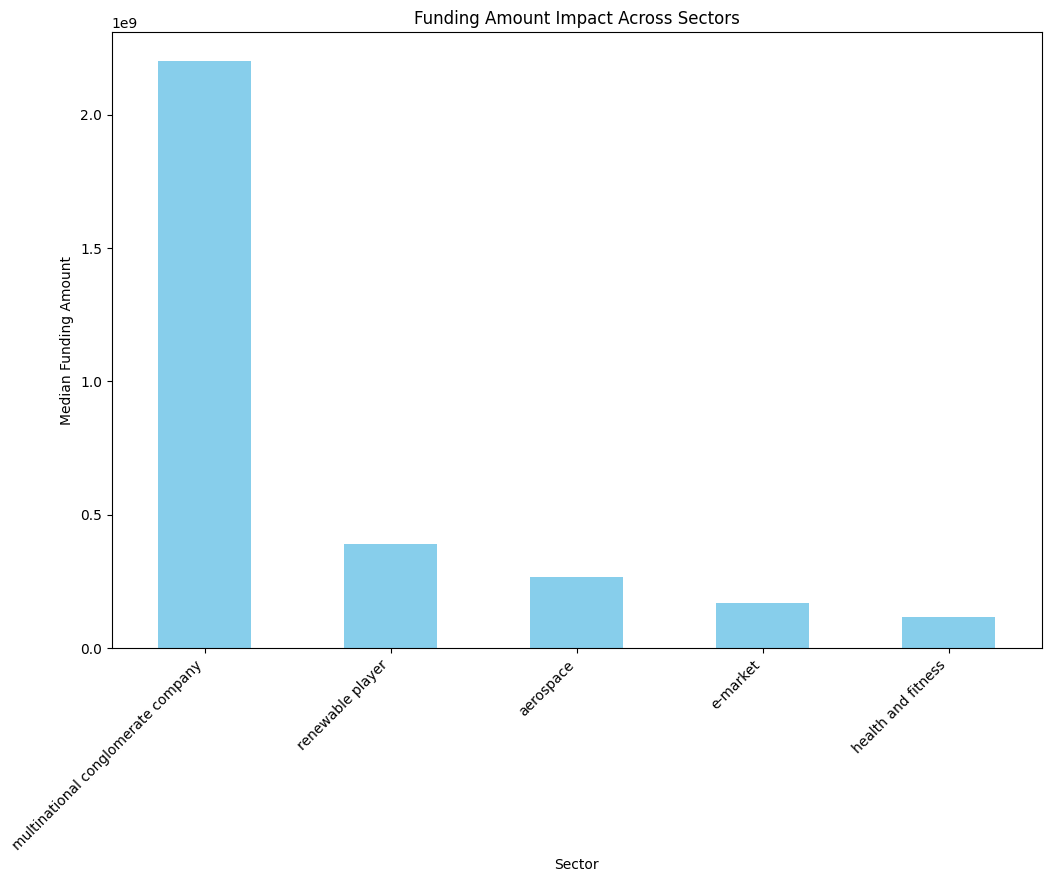

In [59]:


# Visualize the funding amount impact across different sectors
plt.figure(figsize=(12, 8))
amount_impact.plot(kind='bar', color='skyblue')
plt.title('Funding Amount Impact Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Median Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


In [60]:
data['Amount']= data['Amount'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152 entries, 0 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2152 non-null   object 
 1   HeadQuarter    2152 non-null   object 
 2   Sector         2152 non-null   object 
 3   What_it_does   2152 non-null   object 
 4   Amount         2152 non-null   float64
 5   Stage          2152 non-null   object 
dtypes: float64(1), object(5)
memory usage: 117.7+ KB


__Which 5 startups have the highest funding amounts?__

In [68]:

data['Amount'] = data['Amount'].apply(lambda x: Decimal(str(x)))
data['Amount'] = data['Amount'].astype(float)

# Identify the top 5 startups based on funding amount
top_startups = data.nlargest(5, 'Amount')

# Display the top startups
print("\nTop 5 Startups Based on Funding Amount:")
print(top_startups[['Company_Brand', 'Amount']])



Top 5 Startups Based on Funding Amount:
                    Company_Brand        Amount
273  Reliance Retail Ventures Ltd  7.000000e+10
310                     Snowflake  3.000000e+09
321                      Reliance  2.200000e+09
295      Reliance Retail Ventures  8.000000e+08
15                         Zomato  6.600000e+08


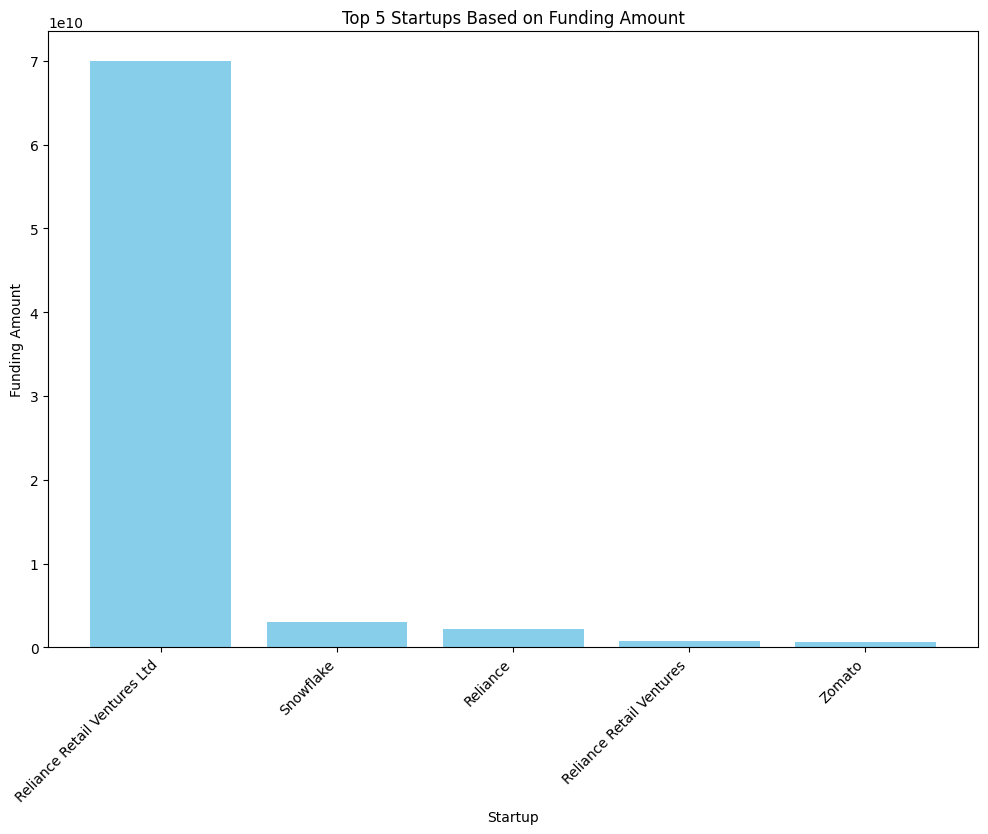

In [69]:
import matplotlib.pyplot as plt

# Plot the funding amount for the top 5 startups
plt.figure(figsize=(12, 8))
plt.bar(top_startups['Company_Brand'], top_startups['Amount'], color='skyblue')
plt.title('Top 5 Startups Based on Funding Amount')
plt.xlabel('Startup')
plt.ylabel('Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


__Hypothesis 5: Stage and Having a Specified Amount__

Null Hypothesis (H0): There is no association between a company's stage and whether it has funding above a specified threshold.

Alternative Hypothesis (H1): Companies in a particular stage are more likely to have funding amounts above a specified threshold.

In [ ]:
# Hypothesis : Stage and Having a Specified Amount

# Chi-squared test for independence
stage_amount_chi2, stage_amount_p, _, _ = stats.chi2_contingency(pd.crosstab(data['Stage'], data['Amount'] > 500000))

print("Hypothesis 5 - Stage and Having a Specified Amount:")
print("Chi-squared p-value:", stage_amount_p)

Hypothesis 5 - Stage and Having a Specified Amount:
Chi-squared p-value: 1.9788596042871308e-13


In [ ]:
from decimal import Decimal, ROUND_HALF_UP


# Convert to Decimal
p_value_decimal = Decimal(str(stage_amount_p))

# Round to 5 decimal places
p_value_rounded = p_value_decimal.quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)

# Display the result
print(p_value_rounded)

0.00


__Interpretation of the p-value:__

A very small p-value (close to zero) indicates strong evidence against the null hypothesis.
In this case, the p-value is much smaller than conventional significance levels (e.g., 0.05 or 0.01), suggesting that you would reject the null hypothesis.

__Conclusion:__

With a p-value this small, you would typically conclude that there is significant evidence to reject the null hypothesis.
Therefore, you may infer that there is a significant relationship between the "Sector" and "Stage" variables in your data.